# Pregunta 1: ¿Cuántos pokemones hay en total?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
# Project root directory
project_root = Path().resolve().parent.parent.parent
pokemon_data_path = project_root / "retos" / "reto-pokemon-jasonssdev" / "data" / "all_pokemon_data.csv"

In [5]:
df_pokemon = pd.read_csv(pokemon_data_path)
df_pokemon.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [6]:
df_pokemon.describe()

,National Dex #,Evolution Stage,Number of Evolution,Catch Rate,Height (dm),Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,494.978041,1.597128,2.108108,92.202703,12.829392,730.995777,50.535473,161.163851,441.633446,70.910473,80.989020,74.817568,72.922297,72.265203,69.728885
std,299.166288,0.700700,0.735618,75.715485,13.646223,1311.060248,53.682455,289.037497,119.296702,26.406800,31.955337,30.324208,32.426324,27.095940,30.110391
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,230.750000,1.000000,2.000000,45.000000,6.000000,89.750000,24.000000,20.000000,330.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,486.500000,1.000000,2.000000,60.000000,10.000000,300.000000,39.000000,66.000000,464.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,751.250000,2.000000,3.000000,127.000000,16.000000,775.500000,63.000000,171.250000,520.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,3.000000,3.000000,255.000000,200.000000,9999.000000,787.000000,2204.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000


In [7]:
df_pokemon['National Dex #'].nunique()

1025

Pregunta 2: ¿Cuáles son los 5 tipos más comunes (columna Primary Typing)?

In [8]:
df_pokemon['Primary Typing'].value_counts().head(5)

Primary Typing
water     145
normal    128
grass     113
bug        89
fire       77
Name: count, dtype: int64

Pregunta 3: ¿Cuál es el promedio de Velocidad (Speed) de todos los pokemones?

In [9]:
df_pokemon['Speed'].mean()

np.float64(69.72888513513513)

 Nivel Medium (Intermedio)

Pregunta 4: ¿Cuál es la correlación entre las estadísticas Attack, Defense y Speed? Muestra un heatmap.

In [14]:
correlacion_matrix = df_pokemon[['Attack', 'Defense', 'Speed']].corr()
print("Matriz de Correlación:")
print(correlacion_matrix)

Matriz de Correlación:
           Attack   Defense     Speed
Attack   1.000000  0.478244  0.375029
Defense  0.478244  1.000000  0.002947
Speed    0.375029  0.002947  1.000000


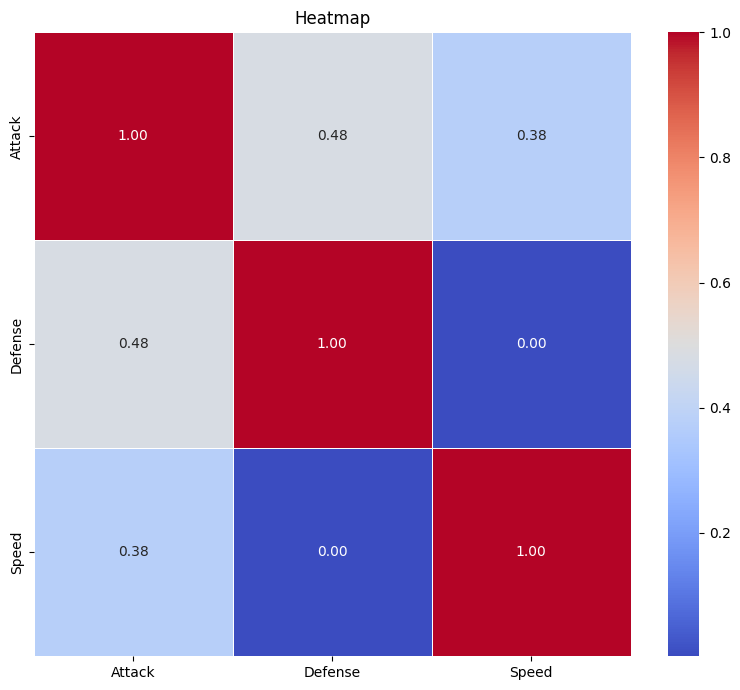

In [17]:
plt.figure(figsize=(8, 7))
sns.heatmap(
    correlacion_matrix,  
    annot=True,          
    cmap='coolwarm',     
                         
    fmt=".2f",           
    linewidths=.5,       
    cbar=True           
)
plt.title('Heatmap')
plt.tight_layout()
plt.show()

Pregunta 5: ¿Qué tipo (Primary Typing) tiene el mayor promedio de Attack?

In [ ]:
average_attack_by_type = df_pokemon.groupby('Primary Typing')['Attack'].mean()
print("Promedio de Attack por tipo principal:")
print(average_attack_by_type)
print("\n" + "="*50 + "\n")

Promedio de Attack por tipo principal:
Primary Typing
bug          71.853933
dark         85.228070
dragon      105.979167
electric     72.042254
fairy        69.451613
fighting    104.960000
fire         84.415584
flying       79.888889
ghost        70.666667
grass        77.743363
ground       92.978261
ice          80.047619
normal       76.101562
poison       76.208333
psychic      74.740260
rock         91.112676
steel        91.232558
water        76.482759
Name: Attack, dtype: float64




In [23]:
type_with_highest_average_attack = average_attack_by_type.idxmax()
highest_average_attack_value = average_attack_by_type.max()
print(f"\nTipo con el mayor promedio de Attack:")
print(average_attack_by_type.sort_values(ascending=False).head(1))


Tipo con el mayor promedio de Attack:
Primary Typing
dragon    105.979167
Name: Attack, dtype: float64


Pregunta 6: Crear un histograma de la variable Speed

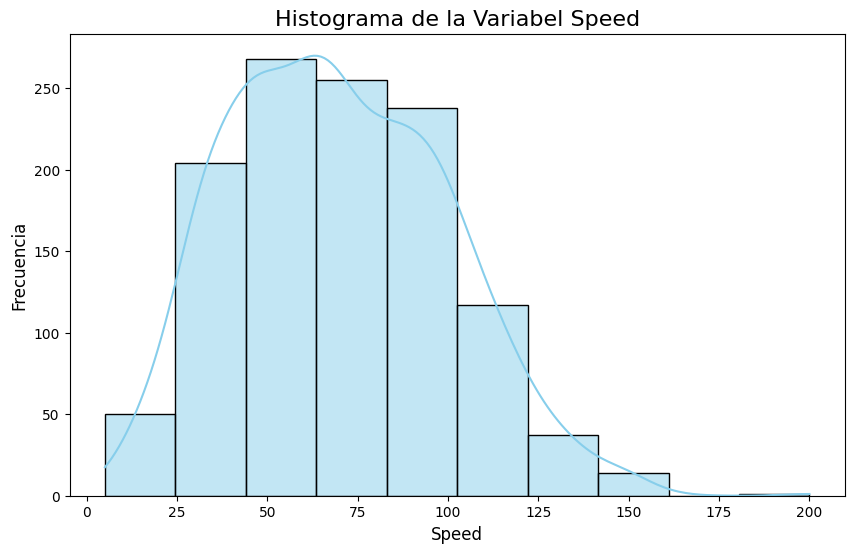

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pokemon['Speed'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variabel Speed', fontsize=16)
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()